In [49]:
import os
import warnings
import pickle
import ast
import string
import re

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
import gensim
from wordcloud import WordCloud

In [53]:
import nltk as nlt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [54]:
nlt.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
nlt.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
credits = pd.read_csv("/content/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/tmdb_5000_movies.csv")

In [57]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [58]:
movies.shape

(4803, 20)

In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [60]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [61]:
credits.shape

(4803, 4)

In [62]:
data = movies.merge(credits, on='title')

In [63]:
data.shape

(4809, 23)

In [64]:
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [66]:
data.drop(columns = ['budget', 'homepage', 'original_language', 'original_title', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count' ], inplace=True)

In [67]:
data.shape

(4809, 9)

In [68]:
data.drop(columns = ['id', 'production_companies'], inplace = True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4809 non-null   object
 1   keywords  4809 non-null   object
 2   overview  4806 non-null   object
 3   title     4809 non-null   object
 4   movie_id  4809 non-null   int64 
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [70]:
data.isna().sum()

genres      0
keywords    0
overview    3
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [71]:
data.dropna(inplace = True)

In [72]:
data.duplicated().sum()

0

In [73]:
data.shape

(4806, 7)

In [74]:
def genre_refined(obj):
    genre_list = []
    new = []
    for x in ast.literal_eval(obj):
        genre_list.append(x['name'])

    for x in genre_list:
        x = x.replace(' ', '')
        new.append(x.lower())
    return new

In [75]:
def keywords_refined(obj):
    refined_list = []
    new_refine = []
    i = 0
    for x in ast.literal_eval(obj):
        refined_list.append(x['name'])
        i += 1
        if i == 8:
            break

    for x in refined_list:
        x = x.replace(' ', '')
        new_refine.append(x.lower())
    return new_refine

In [76]:
def cast_refined(obj):
    cast_list = []
    new_cast = []
    i = 0
    for x in ast.literal_eval(obj):
        cast_list.append(x['name'])
        i +=1
        if i == 3:
            break

    for x in cast_list:
        x = x.replace(' ', '')
        new_cast.append(x.lower())
    return new_cast

In [77]:
def crew_refined(obj):
    crew_list = []
    new_crew = []
    for x in ast.literal_eval(obj):
        if x['job'] == 'Director':
            crew_list.append(x['name'])
            break

    for x in crew_list:
        x = x.replace(' ', '')
        new_crew.append(x.lower())
    return new_crew

In [78]:
ps = PorterStemmer()
def overview_refined(text):
    text = text.lower()
    text = re.sub(re.compile('https?://\S+|www\.\S+|\d+|<.*?>'), '', text)
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    z = y[:]
    y.clear()

    for i in z:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    z = y[:]
    y.clear()

    for i in z:
        y.append(ps.stem(i))

    return y

In [79]:
data['genres'] = data['genres'].apply(genre_refined)
data['keywords'] = data['keywords'].apply(keywords_refined)
data['cast'] = data['cast'].apply(cast_refined)
data['crew'] = data['crew'].apply(crew_refined)

In [80]:
data['overview'] = data['overview'].apply(overview_refined)

In [81]:
data.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[nd, centuri, parapleg, marin, dispatch, moon,...",Avatar,19995,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron]
1,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[captain, barbossa, long, believ, dead, come, ...",Pirates of the Caribbean: At World's End,285,"[johnnydepp, orlandobloom, keiraknightley]",[goreverbinski]
2,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[cryptic, messag, bond, past, send, trail, unc...",Spectre,206647,"[danielcraig, christophwaltz, léaseydoux]",[sammendes]
3,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...","[follow, death, district, attorney, harvey, de...",The Dark Knight Rises,49026,"[christianbale, michaelcaine, garyoldman]",[christophernolan]
4,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","[john, carter, former, militari, captain, inex...",John Carter,49529,"[taylorkitsch, lynncollins, samanthamorton]",[andrewstanton]


In [82]:
data['info'] = data['crew'] + data['cast'] + data['genres'] + data['keywords'] + data['overview']

In [83]:
data.head()

,genres,keywords,overview,title,movie_id,cast,crew,info
0,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[nd, centuri, parapleg, marin, dispatch, moon,...",Avatar,19995,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron],"[jamescameron, samworthington, zoesaldana, sig..."
1,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[captain, barbossa, long, believ, dead, come, ...",Pirates of the Caribbean: At World's End,285,"[johnnydepp, orlandobloom, keiraknightley]",[goreverbinski],"[goreverbinski, johnnydepp, orlandobloom, keir..."
2,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[cryptic, messag, bond, past, send, trail, unc...",Spectre,206647,"[danielcraig, christophwaltz, léaseydoux]",[sammendes],"[sammendes, danielcraig, christophwaltz, léase..."
3,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...","[follow, death, district, attorney, harvey, de...",The Dark Knight Rises,49026,"[christianbale, michaelcaine, garyoldman]",[christophernolan],"[christophernolan, christianbale, michaelcaine..."
4,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","[john, carter, former, militari, captain, inex...",John Carter,49529,"[taylorkitsch, lynncollins, samanthamorton]",[andrewstanton],"[andrewstanton, taylorkitsch, lynncollins, sam..."


In [84]:
final = data[['movie_id', 'title', 'info']]

In [85]:
final.head()

,movie_id,title,info
0,19995,Avatar,"[jamescameron, samworthington, zoesaldana, sig..."
1,285,Pirates of the Caribbean: At World's End,"[goreverbinski, johnnydepp, orlandobloom, keir..."
2,206647,Spectre,"[sammendes, danielcraig, christophwaltz, léase..."
3,49026,The Dark Knight Rises,"[christophernolan, christianbale, michaelcaine..."
4,49529,John Carter,"[andrewstanton, taylorkitsch, lynncollins, sam..."


In [86]:
final['info'] = final['info'].apply(lambda x: " ".join(x))

<ipython-input-86-eb9e49e4c27e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['info'] = final['info'].apply(lambda x: " ".join(x))


In [87]:
final.head()

,movie_id,title,info
0,19995,Avatar,jamescameron samworthington zoesaldana sigourn...
1,285,Pirates of the Caribbean: At World's End,goreverbinski johnnydepp orlandobloom keirakni...
2,206647,Spectre,sammendes danielcraig christophwaltz léaseydou...
3,49026,The Dark Knight Rises,christophernolan christianbale michaelcaine ga...
4,49529,John Carter,andrewstanton taylorkitsch lynncollins samanth...


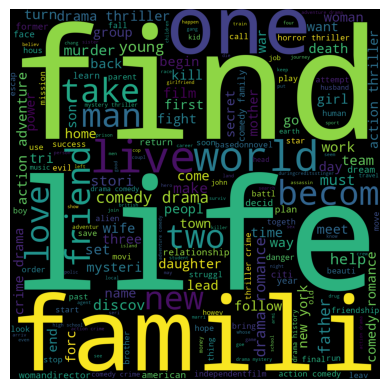

In [91]:
wc = WordCloud(height=1200, width=1200)
wc_pos = wc.generate(final['info'].str.cat(sep = " "))
plt.axis("off")
plt.imshow(wc_pos)

In [92]:
cv = CountVectorizer(max_features=10000, stop_words='english')

In [93]:
vectors = cv.fit_transform(final['info']).toarray()

In [95]:
cv.get_feature_names_out()[1:20]

array(['1940s', '1950s', '1960s', '1970s', '1980s', '19thcentury', '3d',
       'aaron', 'aaroneckhart', 'aarontaylor', 'aba', 'abandon', 'abbi',
       'abbiecornish', 'abduct', 'abhishekbachchan', 'abigail',
       'abigailbreslin', 'abil'], dtype=object)

In [96]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
vectors.shape

(4806, 10000)

In [99]:
similarity_metrics = cosine_similarity(vectors)

In [100]:
similarity_metrics

array([[1.        , 0.10170953, 0.06262243, ..., 0.04794633, 0.        ,
        0.        ],
       [0.10170953, 1.        , 0.06369298, ..., 0.02438299, 0.        ,
        0.        ],
       [0.06262243, 0.06369298, 1.        , ..., 0.04503773, 0.        ,
        0.        ],
       ...,
       [0.04794633, 0.02438299, 0.04503773, ..., 1.        , 0.02026102,
        0.02026102],
       [0.        , 0.        , 0.        , ..., 0.02026102, 1.        ,
        0.02380952],
       [0.        , 0.        , 0.        , ..., 0.02026102, 0.02380952,
        1.        ]])

In [101]:
similarity_metrics.shape

(4806, 4806)

In [105]:
def find_ten(movie):
  ind = final[final['title'] == movie].index[0]
  vec = similarity_metrics[ind]
  movies = sorted(list(enumerate(vec)), reverse=True, key=lambda x:x[1])[1:11]


  for x in movies:
    print(final.iloc[x[0]].title)


In [108]:
find_ten('Iron Man')

Iron Man 2
Iron Man 3
Avengers: Age of Ultron
X-Men
The Helix... Loaded
The Wolverine
The Avengers
Captain America: Civil War
X2
X-Men: Days of Future Past


In [109]:
pickle.dump(final.to_dict(),open('movies.pkl', 'wb'))
pickle.dump(similarity_metrics,open('similarity.pkl', 'wb'))